[View in Colaboratory](https://colab.research.google.com/github/gauravbansal98/Cifar-10-dataset-using-Pre-trained-Inception-model/blob/master/Cifar_10_using_inception_model.ipynb)

In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
from IPython.display import Image, display

In [0]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import time
from datetime import timedelta
import os

os.chdir('drive/Cifar-10 dataset using inception model')

In [5]:
tf.__version__

'1.8.0'

In [0]:
import inception

In [0]:
import cifar10

In [0]:
from cifar10 import num_classes

In [0]:
cifar10.data_path = "data/CIFAR-10/"

In [10]:
cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [11]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [12]:
images_train, cls_train, labels_train = cifar10.load_training_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5


In [13]:
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [14]:
print("Size of:")
print("- Training-set:\t\t{}".format(len(images_train)))
print("- Test-set:\t\t{}".format(len(images_test)))

Size of:
- Training-set:		50000
- Test-set:		10000


In [0]:
def plot_images(images, cls_true, cls_pred=None, smooth=True):

    assert len(images) == len(cls_true)

    # Create figure with sub-plots.
    fig, axes = plt.subplots(3, 3)

    # Adjust vertical spacing.
    if cls_pred is None:
        hspace = 0.3
    else:
        hspace = 0.6
    fig.subplots_adjust(hspace=hspace, wspace=0.3)

    # Interpolation type.
    if smooth:
        interpolation = 'spline16'
    else:
        interpolation = 'nearest'

    for i, ax in enumerate(axes.flat):
        # There may be less than 9 images, ensure it doesn't crash.
        if i < len(images):
            # Plot image.
            ax.imshow(images[i],
                      interpolation=interpolation)

            # Name of the true class.
            cls_true_name = class_names[cls_true[i]]

            # Show true and predicted classes.
            if cls_pred is None:
                xlabel = "True: {0}".format(cls_true_name)
            else:
                # Name of the predicted class.
                cls_pred_name = class_names[cls_pred[i]]

                xlabel = "True: {0}\nPred: {1}".format(cls_true_name, cls_pred_name)

            # Show the classes as the label on the x-axis.
            ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

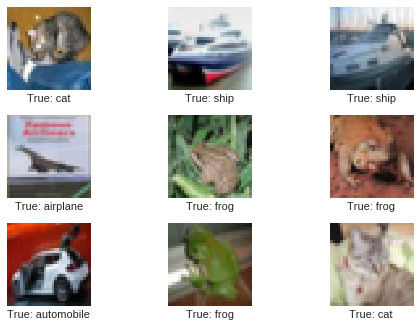

In [16]:
images = images_test[0:9]

# Get the true classes for those images.
cls_true = cls_test[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true, smooth=False)

In [0]:
inception.data_dir = 'inception/'

In [18]:
inception.maybe_download()

Data has apparently already been downloaded and unpacked.


In [0]:
model = inception.Inception()

In [0]:
from inception import transfer_values_cache

In [0]:
file_path_cache_train = os.path.join(cifar10.data_path, 'inception_cifar10_train.pkl')
file_path_cache_test = os.path.join(cifar10.data_path, 'inception_cifar10_test.pkl')

In [22]:
print("Processing Inception transfer-values for training-images ...")

# Scale images because Inception needs pixels to be between 0 and 255,
# while the CIFAR-10 functions return pixels between 0.0 and 1.0
images_scaled = images_train * 255.0

# If transfer-values have already been calculated then reload them,
# otherwise calculate them and save them to a cache-file.
transfer_values_train = transfer_values_cache(cache_path=file_path_cache_train,
                                              images=images_scaled,
                                              model=model)

Processing Inception transfer-values for training-images ...
- Data loaded from cache-file: data/CIFAR-10/inception_cifar10_train.pkl


In [23]:
print("Processing Inception transfer-values for test-images ...")

# Scale images because Inception needs pixels to be between 0 and 255,
# while the CIFAR-10 functions return pixels between 0.0 and 1.0
images_scaled = images_test * 255.0

# If transfer-values have already been calculated then reload them,
# otherwise calculate them and save them to a cache-file.
transfer_values_test = transfer_values_cache(cache_path=file_path_cache_test,
                                             images=images_scaled,
                                             model=model)

Processing Inception transfer-values for test-images ...
- Data loaded from cache-file: data/CIFAR-10/inception_cifar10_test.pkl


In [24]:
transfer_values_train.shape

(50000, 2048)

In [25]:
transfer_values_test.shape

(10000, 2048)

In [0]:
def plot_transfer_values(i):
    print("Input image:")
    
    # Plot the i'th image from the test-set.
    plt.imshow(images_test[i], interpolation='nearest')
    plt.show()

    print("Transfer-values for the image using Inception model:")
    
    # Transform the transfer-values into an image.
    img = transfer_values_test[i]
    img = img.reshape((32, 64))

    # Plot the image for the transfer-values.
    plt.imshow(img, interpolation='nearest', cmap='Reds')
    plt.show()

Input image:


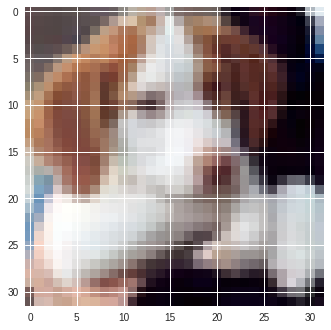

Transfer-values for the image using Inception model:


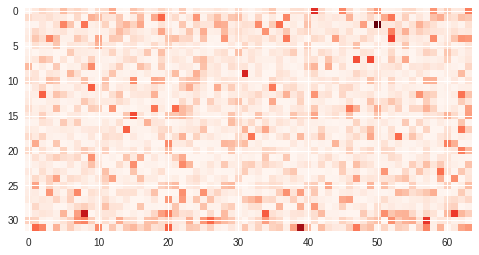

In [27]:
plot_transfer_values(i=16)

In [0]:
!pip install -r requirements.txt
!pip install sklearn.decomposition
from sklearn.decomposition import PCA

In [0]:
pca = PCA(n_components=2)

In [0]:
transfer_values = transfer_values_train[0:3000]

In [0]:
cls = cls_train[0:3000]

In [32]:
transfer_values.shape

(3000, 2048)

In [0]:
transfer_values_reduced = pca.fit_transform(transfer_values)

In [34]:
transfer_values_reduced.shape

(3000, 2)

In [0]:
def plot_scatter(values, cls):
    # Create a color-map with a different color for each class.
    import matplotlib.cm as cm
    cmap = cm.rainbow(np.linspace(0.0, 1.0, num_classes))

    # Get the color for each sample.
    colors = cmap[cls]

    # Extract the x- and y-values.
    x = values[:, 0]
    y = values[:, 1]

    # Plot it.
    plt.scatter(x, y, color=colors)
    plt.show()

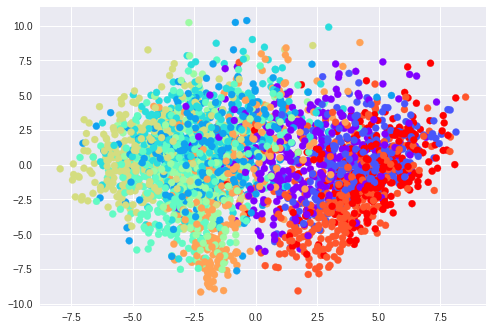

In [36]:
plot_scatter(transfer_values_reduced, cls)

In [0]:
from sklearn.manifold import TSNE

In [0]:
pca = PCA(n_components=50)
transfer_values_50d = pca.fit_transform(transfer_values)

In [0]:
tsne = TSNE(n_components=2)

In [0]:
transfer_values_reduced = tsne.fit_transform(transfer_values_50d)

In [41]:
transfer_values_reduced.shape

(3000, 2)

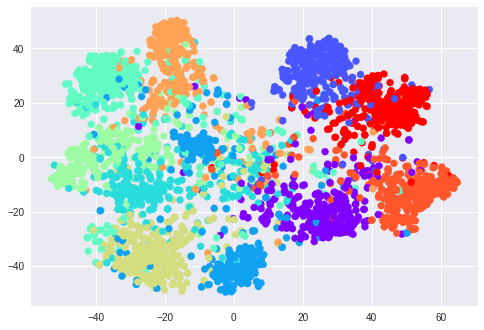

In [42]:
plot_scatter(transfer_values_reduced, cls)

In [0]:
import cache

In [44]:
def fn():
  print("loading data")
train_data = cache.cache(file_path_cache_train, fn = fn)
test_data = cache.cache(file_path_cache_test, fn = fn)

- Data loaded from cache-file: data/CIFAR-10/inception_cifar10_train.pkl
- Data loaded from cache-file: data/CIFAR-10/inception_cifar10_test.pkl


In [45]:
print(np.shape(train_data))

(50000, 2048)


In [46]:
print(np.shape(test_data))
print(np.shape(labels_train))
print(np.shape(cls_train))

(10000, 2048)
(50000, 10)
(50000,)


In [0]:
tf.reset_default_graph()
hm_epochs = 100
batch_size = 49999

starting_learning_rate = .01

mode = tf.placeholder(dtype = tf.bool, name = 'mode')

x = tf.placeholder(dtype = tf.float32, shape = [None, 2048], name = 'input_labels')
y = tf.placeholder(dtype = tf.int32, shape = [None, 10], name = 'output_labels')
global_step = tf.Variable(0, trainable = False, name = 'global_step')
learning_rate = tf.placeholder('float')

In [0]:
weights = {'weights' : tf.Variable(tf.random_normal([512, 10]), name = 'weights'), 
           'biases' : tf.Variable(tf.random_normal([1, 10]))}

In [0]:
def neural_network(x, mode):
  dense1 = tf.layers.dense(inputs=x, units=1024, activation=tf.nn.relu)
  dropout = tf.layers.dropout(inputs = dense1, rate= .2, training=mode)
  dense2 = tf.layers.dense(inputs= dropout, units=512, activation=tf.nn.relu)
  dropout2 = tf.layers.dropout(inputs = dense2, rate= .2, training=mode)
  outputs = tf.matmul(dropout2, weights['weights']) + weights['biases']
  
  return outputs

In [50]:

prediction = neural_network(x, mode)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = prediction, labels = y))

#learning_rate = tf.train.exponential_decay(starting_learning_rate, global_step,
                                            #4, 0.96, staircase=True)

optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost, global_step = global_step)

sess = tf.Session()
sess.run(tf.global_variables_initializer())


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [51]:
len_of_training_data = 50000
for i in range(50):
  epoch_loss = 0
  starting  = 0
  end = batch_size
  
  while end < 50000:
    epoch_x = train_data[starting : end, :]
    epoch_y = labels_train[starting : end, :]

    o, c = sess.run([optimizer, cost], feed_dict = {x : epoch_x, y : epoch_y, mode : True, learning_rate : 0.0005})
    epoch_loss += c
    starting = end
    end += batch_size
  print('epoch' , i, 'completed out of ', hm_epochs, 'loss ', epoch_loss)  
  correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))

  accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
  print('Accuracy:',sess.run(accuracy, feed_dict = {x:test_data, y:labels_test, mode : False})) 

epoch 0 completed out of  100 loss  14.596736907958984
Accuracy: 0.1984
epoch 1 completed out of  100 loss  15.892841339111328
Accuracy: 0.2425
epoch 2 completed out of  100 loss  16.115772247314453
Accuracy: 0.2286
epoch 3 completed out of  100 loss  11.895790100097656
Accuracy: 0.5869
epoch 4 completed out of  100 loss  5.2986159324646
Accuracy: 0.5605
epoch 5 completed out of  100 loss  4.58944034576416
Accuracy: 0.5632
epoch 6 completed out of  100 loss  3.9524545669555664
Accuracy: 0.6008
epoch 7 completed out of  100 loss  3.2150700092315674
Accuracy: 0.568
epoch 8 completed out of  100 loss  3.284945487976074
Accuracy: 0.6602
epoch 9 completed out of  100 loss  2.4072844982147217
Accuracy: 0.741
epoch 10 completed out of  100 loss  1.8153756856918335
Accuracy: 0.6867
epoch 11 completed out of  100 loss  1.9910335540771484
Accuracy: 0.7018
epoch 12 completed out of  100 loss  2.011930227279663
Accuracy: 0.7338
epoch 13 completed out of  100 loss  1.7917721271514893
Accuracy: 0.75

In [52]:
correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))

accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
print('Accuracy:',sess.run(accuracy, feed_dict = {x:test_data, y:labels_test, mode : False})) 

Accuracy: 0.8577
